# Week4授業前課題1
## アヤメの分類
Week3で使用したirisデータセットを使い、分類問題を解く練習をします。

# 【課題1】
## 練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

- virgicolorとvirginica
- sepal_lengthとpetal_length


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
# load iris (dictionary型)
data = load_iris()

# 説明変数
X = pd.DataFrame(data=data.get('data'), 
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# 目的変数
Y = pd.DataFrame(data=data.get('target'),
    columns=['Species'])

# 列の抽出
df_iris = pd.concat((X, Y), axis=1)[['sepal_length', 'petal_length', 'Species']]
# Species: virgicolor = 1, verginica = 2
df_iris = df_iris[df_iris['Species'] != 0]

display(df_iris)

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


# 【問題2】
## データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

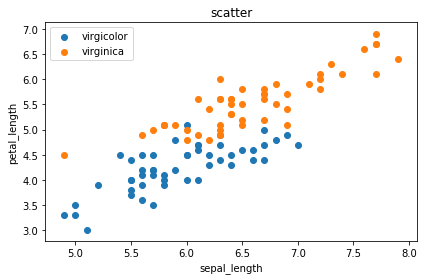

In [2]:
import matplotlib.pyplot as plt

# 散布図
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_title('scatter')
ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_length')

ax.scatter(df_iris[df_iris['Species'] == 1]['sepal_length'],
    df_iris[df_iris['Species'] == 1]['petal_length'], label='virgicolor')
ax.scatter(df_iris[df_iris['Species'] == 2]['sepal_length'],
    df_iris[df_iris['Species'] == 2]['petal_length'], label='virginica')

ax.legend()

plt.tight_layout()
plt.show()

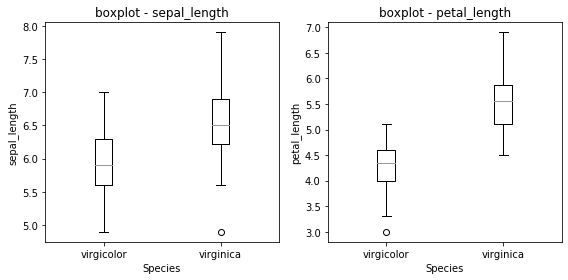

In [3]:
# 箱ひげ図
fig = plt.figure(figsize=(8, 4))

# sepal_length
ax1 = fig.add_subplot(121)
ax1.set_title('boxplot - sepal_length')
ax1.set_xlabel('Species')
ax1.set_ylabel('sepal_length')

ax1.boxplot([df_iris[df_iris['Species'] == 1]['sepal_length'], 
    df_iris[df_iris['Species'] == 2]['sepal_length']])
ax1.set_xticklabels(['virgicolor', 'virginica'])

# petal_length
ax2 = fig.add_subplot(122)
ax2.set_title('boxplot - petal_length')
ax2.set_xlabel('Species')
ax2.set_ylabel('petal_length')

ax2.boxplot([df_iris[df_iris['Species'] == 1]['petal_length'], 
    df_iris[df_iris['Species'] == 2]['petal_length']])
ax2.set_xticklabels(['virgicolor', 'virginica'])

plt.tight_layout()
plt.show()

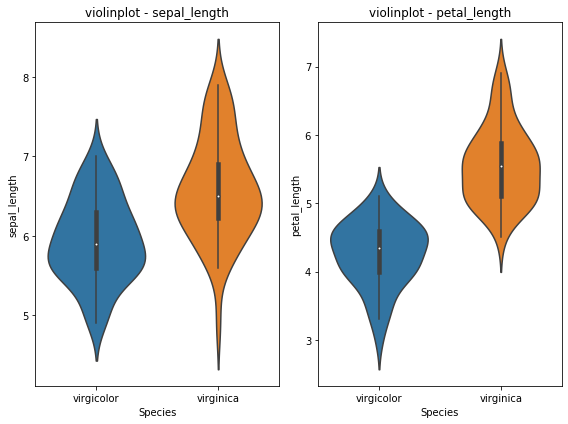

In [4]:
import seaborn as sns

# バイオリン図
fig = plt.figure(figsize=(8, 6))

# sepal_length
ax1 = fig.add_subplot(121)
ax1.set_title('violinplot - sepal_length')
ax1 = sns.violinplot(x='Species', y='sepal_length', data=df_iris)
ax1.set_xticklabels(['virgicolor', 'virginica'])

# petal_length
ax2 = fig.add_subplot(122)
ax2.set_title('violinplot - petal_length')
ax2 = sns.violinplot(x='Species', y='petal_length', data=df_iris)
ax2.set_xticklabels(['virgicolor', 'virginica'])

plt.tight_layout()
plt.show()

# 【問題3】
## 前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。

In [5]:
from sklearn.model_selection import train_test_split

ndarray_iris = df_iris.values
print(ndarray_iris)

X_train, X_test, y_train, y_test = train_test_split(ndarray_iris[:, :2], ndarray_iris[:, 2])

print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[7.  4.7 1. ]
 [6.4 4.5 1. ]
 [6.9 4.9 1. ]
 [5.5 4.  1. ]
 [6.5 4.6 1. ]
 [5.7 4.5 1. ]
 [6.3 4.7 1. ]
 [4.9 3.3 1. ]
 [6.6 4.6 1. ]
 [5.2 3.9 1. ]
 [5.  3.5 1. ]
 [5.9 4.2 1. ]
 [6.  4.  1. ]
 [6.1 4.7 1. ]
 [5.6 3.6 1. ]
 [6.7 4.4 1. ]
 [5.6 4.5 1. ]
 [5.8 4.1 1. ]
 [6.2 4.5 1. ]
 [5.6 3.9 1. ]
 [5.9 4.8 1. ]
 [6.1 4.  1. ]
 [6.3 4.9 1. ]
 [6.1 4.7 1. ]
 [6.4 4.3 1. ]
 [6.6 4.4 1. ]
 [6.8 4.8 1. ]
 [6.7 5.  1. ]
 [6.  4.5 1. ]
 [5.7 3.5 1. ]
 [5.5 3.8 1. ]
 [5.5 3.7 1. ]
 [5.8 3.9 1. ]
 [6.  5.1 1. ]
 [5.4 4.5 1. ]
 [6.  4.5 1. ]
 [6.7 4.7 1. ]
 [6.3 4.4 1. ]
 [5.6 4.1 1. ]
 [5.5 4.  1. ]
 [5.5 4.4 1. ]
 [6.1 4.6 1. ]
 [5.8 4.  1. ]
 [5.  3.3 1. ]
 [5.6 4.2 1. ]
 [5.7 4.2 1. ]
 [5.7 4.2 1. ]
 [6.2 4.3 1. ]
 [5.1 3.  1. ]
 [5.7 4.1 1. ]
 [6.3 6.  2. ]
 [5.8 5.1 2. ]
 [7.1 5.9 2. ]
 [6.3 5.6 2. ]
 [6.5 5.8 2. ]
 [7.6 6.6 2. ]
 [4.9 4.5 2. ]
 [7.3 6.3 2. ]
 [6.7 5.8 2. ]
 [7.2 6.1 2. ]
 [6.5 5.1 2. ]
 [6.4 5.3 2. ]
 [6.8 5.5 2. ]
 [5.7 5.  2. ]
 [5.8 5.1 2. ]
 [6.4 5.3 2. ]
 [6.5 5.5 

# 【問題4】
## 前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。


標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

print(X_train_std)
print(X_train_std)

[6.22666667 4.912     ]
[[-0.19311496 -0.01450398]
 [-0.6504925   0.22722909]
 [-0.49803332  0.22722909]
 [-0.95541086 -1.58576898]
 [-1.87016594 -1.94836859]
 [ 2.24623192  2.1610937 ]
 [ 0.41672176  0.71069524]
 [ 0.41672176  1.07329486]
 [ 1.17901766 -0.25623706]
 [-0.6504925  -1.22316937]
 [-1.87016594 -1.70663552]
 [ 0.26426258  0.83156178]
 [-0.95541086 -0.86056975]
 [ 0.56918094 -0.3771036 ]
 [ 0.26426258  0.46896217]
 [ 0.1118034   0.83156178]
 [ 0.72164012  0.83156178]
 [ 0.8740993   1.1941614 ]
 [-0.49803332 -0.13537052]
 [-0.49803332 -0.86056975]
 [-0.95541086 -0.01450398]
 [ 0.1118034  -0.01450398]
 [ 2.09377274  2.04022716]
 [-2.02262513 -1.94836859]
 [ 0.72164012  0.34809563]
 [ 1.48393602  1.43589447]
 [ 1.48393602  1.31502793]
 [-1.71770676 -2.31096821]
 [ 1.33147684  1.1941614 ]
 [ 0.1118034  -0.25623706]
 [ 0.1118034  -0.61883668]
 [ 0.41672176 -0.3771036 ]
 [-0.6504925  -0.98143629]
 [-1.10787004 -1.10230283]
 [ 0.41672176  0.22722909]
 [ 0.1118034   0.22722909]
 [-1

# 【問題5】
## 学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。

学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# n_neighbors=5(default)
neigh_5 = KNeighborsClassifier()
neigh_5.fit(X_train_std, y_train)

y_pred_5 = neigh_5.predict(X_test_std)

print(y_pred_5)
print(y_test)

print("5-nn score: {:.2f}".format(neigh_5.score(X_test_std, y_test)))

[1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1.
 1.]
[1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1.
 1.]
5-nn score: 0.92


In [8]:
# n_neighbors=1
neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_1.fit(X_train_std, y_train)

y_pred_1 = neigh_1.predict(X_test_std)

print(y_pred_1)
print(y_test)

print("1-nn score: {:.2f}".format(neigh_1.score(X_test_std, y_test)))

[1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1.
 1.]
[1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1.
 1.]
1-nn score: 0.96


In [9]:
# n_neighbors=3
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_3.fit(X_train_std, y_train)

y_pred_3 = neigh_3.predict(X_test_std)

print(y_pred_3)
print(y_test)

print("3-nn score: {:.2f}".format(neigh_3.score(X_test_std, y_test)))

[1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1.
 1.]
[1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1.
 1.]
3-nn score: 0.96


# 【問題6】
## 評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。

- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる

In [10]:
# scikit-learnを使い4種類の指標を計算する
# Accuracy（正解率）
from sklearn.metrics import accuracy_score
print("5-nn accuracy: {}".format(accuracy_score(y_test, y_pred_5)))
print("1-nn accuracy: {}".format(accuracy_score(y_test, y_pred_1)))
print("3-nn accuracy: {}".format(accuracy_score(y_test, y_pred_3)))

# Precision（適合率）
from sklearn.metrics import precision_score
print("5-nn precision: {}".format(precision_score(y_test, y_pred_5)))
print("1-nn precision: {}".format(precision_score(y_test, y_pred_1)))
print("3-nn precision: {}".format(precision_score(y_test, y_pred_3)))

# Recall（再現率）
from sklearn.metrics import recall_score
print("5-nn recall: {}".format(recall_score(y_test, y_pred_5)))
print("1-nn recall: {}".format(recall_score(y_test, y_pred_1)))
print("3-nn recall: {}".format(recall_score(y_test, y_pred_3)))

# F値
from sklearn.metrics import f1_score
print("5-nn f1: {}".format(f1_score(y_test, y_pred_5)))
print("1-nn f1: {}".format(f1_score(y_test, y_pred_1)))
print("3-nn f1: {}".format(f1_score(y_test, y_pred_3)))

5-nn accuracy: 0.92
1-nn accuracy: 0.96
3-nn accuracy: 0.96
5-nn precision: 1.0
1-nn precision: 1.0
3-nn precision: 1.0
5-nn recall: 0.8823529411764706
1-nn recall: 0.9411764705882353
3-nn recall: 0.9411764705882353
5-nn f1: 0.9375
1-nn f1: 0.9696969696969697
3-nn f1: 0.9696969696969697


In [11]:
# 混同行列をscikit-learnを使い表示する
from sklearn.metrics import confusion_matrix
print("5-nn confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred_5)))
print("1-nn confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred_1)))
print("3-nn confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred_3)))

5-nn confusion matrix:
[[15  2]
 [ 0  8]]
1-nn confusion matrix:
[[16  1]
 [ 0  8]]
3-nn confusion matrix:
[[16  1]
 [ 0  8]]


# 4種類の指標値の意味について簡単に調査して文章でまとめる
以下、(真陽性, 真陰性, 偽陽性, 偽陰性) = (TP, TF, FP, FN)とおく。
## Accuracy（正解率）
**Accuracy = (TP+TN)/(TP+TN+FP+FN)**

予測データのうち、実際の値と合致していたデータの割合
## Precision（適合率）
**Precision = TP/(TP+FP)**

正と予測したデータのうち実際の値も正であったデータの割合
## Recall（再現率）
**Recall = TP/(TP+FN)**

実際に正であったデータのうち、正と予測したデータの割合
## F値
**F-measure = (2\*Precision\*Recall)/Precision+Recall**

Precision（適合率）とRecall（再現率）の調和平均

# 【問題7】
## 可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

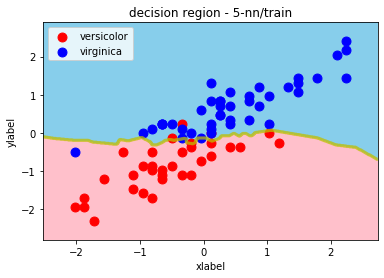

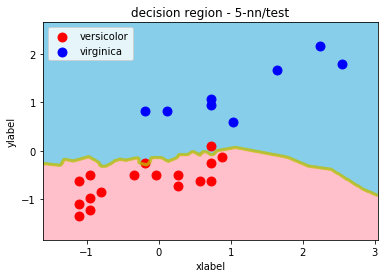

In [13]:
# 可視化を行う
# 5-nn
%matplotlib inline
decision_region(X_train_std, y_train, neigh_5, title='decision region - 5-nn/train')
decision_region(X_test_std, y_test, neigh_5, title='decision region - 5-nn/test')

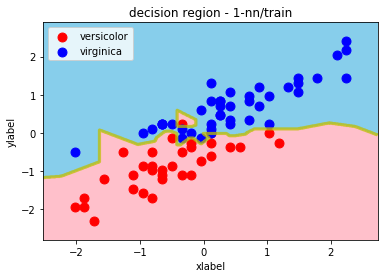

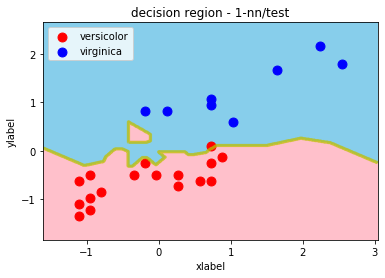

In [14]:
# 1-nn
%matplotlib inline
decision_region(X_train_std, y_train, neigh_1, title='decision region - 1-nn/train')
decision_region(X_test_std, y_test, neigh_1, title='decision region - 1-nn/test')

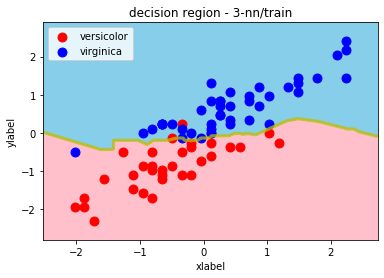

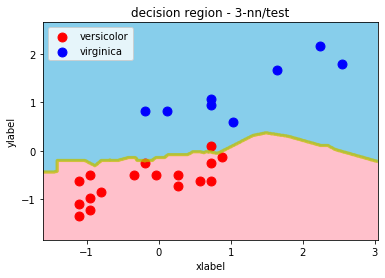

In [15]:
# 3-nn
%matplotlib inline
decision_region(X_train_std, y_train, neigh_3, title='decision region - 3-nn/train')
decision_region(X_test_std, y_test, neigh_3, title='decision region - 3-nn/test')

# 【問題8】
## 他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

In [ ]:
# 最近傍法

In [ ]:
# ロジスティック回帰

In [ ]:
# SVM

In [ ]:
# 決定木

In [ ]:
# ランダムフォレスト